In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('results/experiment1_20211208181535.csv')
df.write_latencies = df.write_latencies * 1000
df.read_latencies = df.read_latencies * 1000
df.head()

,write_latencies,read_latencies,system
0,0.509081,0.217010,order_after_write
1,0.525935,0.177596,order_after_write
2,0.624393,0.293948,order_after_write
3,0.542233,0.156860,order_after_write
4,0.507256,0.272425,order_after_write


/Users/steliosrammos/Documents/Education/VU-CS-Master/Year2/period2/distributed-systems/distributed-systems/venv/lib/python3.9/site-packages/pandas/plotting/_matplotlib/boxplot.py:394: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  ax = boxplot(


Text(0.5, 0.98, 'Mean Latency Per Operation')

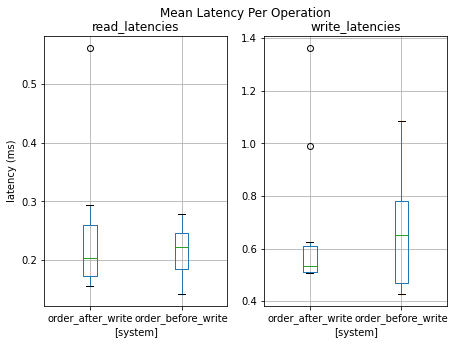

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(7, 5))

df.boxplot(by='system', ax=axs, grid=True)
axs[0].set(ylabel='latency (ms)')
fig.suptitle('Mean Latency Per Operation')

In [17]:
# fig = ax.get_figure()
fig.savefig('results/figures/order_before_vs_after_write.pdf')